<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/Ames_house_pricing_analysis_step_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sweetviz as sw

import seaborn as sns

Mounted at /content/drive


In [2]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 315kB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [3]:
import sweetviz as sw


# **Subrutinok**

In [4]:
def checkvalues(columnname,key):
    print(f"{columnname} ellenőrzése !")
    numok=0
    numerr=0
    for i in df.index:
        if df.at[i,columnname] in key:
            #print(df.at[i,columnname])
            numok+=1
            pass
        else:
            numerr+=1
            print(df.at[i,columnname],end=", ")
    sumall=numok+numerr
    print(f"\n{sumall} mintából {numerr} db nem volt megfelelő")

In [5]:
def createcolumn(columnname,keys):
    for key in keys:
        df[keys[key]]=0.0
    for key in keys:
        for i in df.index:
            if df.at[i,columnname]==key:
                df.at[i,keys[key]]=1.0

# **Adattisztítás**

In [6]:

df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/train.csv")
#df.head()

#correlationMAt=df.corr()
#print(correlationMAt)

In [7]:
a=set(df["Neighborhood"])
#print(a)
#df.mean()
salePrice_by_Neighborhood=df.groupby("Neighborhood")[["SalePrice"]].describe()
#print(salePrice_by_Neighborhood)

#print(salePrice_by_Neighborhood[("SalePrice","mean")])
salePrice_by_Neighborhood.columns=salePrice_by_Neighborhood.columns.droplevel(0)
#print(salePrice_by_Neighborhood.columns)
dfs=salePrice_by_Neighborhood["mean"]
#print(dfs)
dfs2=dfs.sort_values(0)
#print(dfs2)
dfs2_enum=dfs2.index
rangsor={i:index for index,i in enumerate(dfs2_enum)}
print(rangsor)

{'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'Blueste': 7, 'SWISU': 8, 'NPkVill': 9, 'NAmes': 10, 'Mitchel': 11, 'SawyerW': 12, 'NWAmes': 13, 'Gilbert': 14, 'Blmngtn': 15, 'CollgCr': 16, 'Crawfor': 17, 'ClearCr': 18, 'Somerst': 19, 'Veenker': 20, 'Timber': 21, 'StoneBr': 22, 'NridgHt': 23, 'NoRidge': 24}


**És megvan a kerületek rangsora... :-)**

# **Tegyük bele a Dataframe-be **

In [8]:
# Annyi mindent csináltunk, itt újraolvasom...
df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/train.csv")
#df.head()

for neigh_name in rangsor:
    df[neigh_name]=0.0
for neigh_name in rangsor:
    print(neigh_name)
    for i in df.index:
        if df.at[i,"Neighborhood"]==neigh_name:
            df.at[i,neigh_name]=1
            
#print(df["Neighborhood"])  kiírjuk, hogy számok lettek -e

MeadowV
IDOTRR
BrDale
BrkSide
Edwards
OldTown
Sawyer
Blueste
SWISU
NPkVill
NAmes
Mitchel
SawyerW
NWAmes
Gilbert
Blmngtn
CollgCr
Crawfor
ClearCr
Somerst
Veenker
Timber
StoneBr
NridgHt
NoRidge


In [9]:
#df.head()

# MSZoning: Identifies the general zoning classification of the sale.

        A	Agriculture
        C	Commercial
        FV	Floating Village Residential
        I	Industrial
        RH	Residential High Density
        RL	Residential Low Density
        RP	Residential Low Density Park 
        RM	Residential Medium Density

In [10]:
def create_dict(idx,list):
    o={}
    for i in list:
        o[i]=idx+"_"+i
    return o

In [11]:
t=["A","C (all)","FV","I","RH","RL","RP","RM",]
idx="MSZoning"
keys=create_dict(idx,t)
print(keys)

checkvalues(idx,keys)
#print(df[idx])
createcolumn(idx,keys)

{'A': 'MSZoning_A', 'C (all)': 'MSZoning_C (all)', 'FV': 'MSZoning_FV', 'I': 'MSZoning_I', 'RH': 'MSZoning_RH', 'RL': 'MSZoning_RL', 'RP': 'MSZoning_RP', 'RM': 'MSZoning_RM'}
MSZoning ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Street**: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [12]:
t=["Grvl","Pave"]
columnname="Street"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

Street ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Alley**: Type of alley access to property  **dropped**

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [13]:
t=["Grvl", "Pave", "Na"]
columnname="Alley"
key=create_dict(columnname,t)
checkvalues(columnname,key)
#createcolumn(columnname,key)
df.drop(columns=["Alley"], inplace=True)
df.head()

Alley ellenőrzése !
nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MeadowV,IDOTRR,BrDale,BrkSide,Edwards,OldTown,Sawyer,Blueste,SWISU,NPkVill,NAmes,Mitchel,SawyerW,NWAmes,Gilbert,Blmngtn,CollgCr,Crawfor,ClearCr,Somerst,Veenker,Timber,StoneBr,NridgHt,NoRidge,MSZoning_A,MSZoning_C (all),MSZoning_FV,MSZoning_I,MSZoning_RH,MSZoning_RL,MSZoning_RP,MSZoning_RM,Street_Grvl,Street_Pave
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,2,2008,WD,Normal,208500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,5,2007,WD,Normal,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,9,2008,WD,Normal,223500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,12,2008,WD,Normal,250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [14]:
t=["Reg","IR1","IR2","IR3"]
columnname="LotShape"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

LotShape ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [15]:
t=["Lvl","Bnk","HLS","Low"]
columnname="LandContour"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

LandContour ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [16]:
t=["AllPub","NoSewr","NoSeWa","ELO"]
columnname="Utilities"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

Utilities ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [17]:
t=["Inside","Corner","CulDSac","FR2","FR3"]
columnname="LotConfig"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

LotConfig ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [18]:
t=["Gtl","Mod","Sev"]
columnname="LandSlope"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

LandSlope ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [19]:
t=["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"]
columnname="Condition1"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

Condition1 ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [20]:
t=["Artery","Feedr","Norm","RRNn","RRAn","PosN","PosA","RRNe","RRAe"]
columnname="Condition2"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

Condition2 ellenőrzése !

1460 mintából 0 db nem volt megfelelő


In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Street_Grvl,Street_Pave,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_AllPub,Utilities_NoSewr,Utilities_NoSeWa,Utilities_ELO,LotConfig_Inside,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_RRNn,Condition1_RRAn,Condition1_PosN,Condition1_PosA,Condition1_RRNe,Condition1_RRAe,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_RRNn,Condition2_RRAn,Condition2_PosN,Condition2_PosA,Condition2_RRNe,Condition2_RRAe
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [22]:
t=["1Fam","2fmCon","Duplex","TwnhsE","Twnhs"]
columnname="BldgType"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

BldgType ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level


---



In [23]:
t=["1Story","1.5Fin","1.5Unf","2Story","2.5Fin","2.5Unf","SFoyer","SLvl"]
columnname="HouseStyle"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

HouseStyle ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed


---



In [24]:
t=["Flat","Gable","Gambrel","Hip","Mansard","Shed"]
columnname="RoofStyle"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

RoofStyle ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles


---



In [25]:
t=["ClyTile","CompShg","Membran","Metal","Roll","Tar&Grv","WdShake","WdShngl"]

columnname="RoofMatl"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

RoofMatl ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles


---



In [26]:

t=["AsbShng","AsphShn","BrkComm","BrkFace","CBlock","CemntBd","HdBoard","ImStucc","MetalSd","Other","Plywood","PreCast","Stone","Stucco","VinylSd","Wd Sdng","WdShing"]

columnname="Exterior1st"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

Exterior1st ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# Exterior2st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles


---



In [27]:

t=["AsbShng","AsphShn","BrkComm","BrkFace","CBlock","CmentBd","HdBoard","ImStucc","MetalSd","Other","Plywood","PreCast","Stone","Stucco","VinylSd","Wd Sdng","Wd Shng","Brk Cmn"]

columnname="Exterior2nd"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

Exterior2nd ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone


---



In [28]:

t=["BrkCmn","BrkFace","CBlock","None","Stone","nan"]

columnname="MasVnrType"
key=create_dict(columnname,t)

checkvalues(columnname,key)

# 8 db nan van a táblában! 
# ezel legyenek None értékre átírva:
for i in df.index:
    if pd.isna(df.loc[i,columnname]):
        print("Nan volt", end=",\n")
        df.loc[i,columnname]="None"
    else:
        print(f"<{i},{df.loc[i,columnname]}>" ,end=", ") 
checkvalues(columnname,key)
createcolumn(columnname,key)

MasVnrType ellenőrzése !
nan, nan, nan, nan, nan, nan, nan, nan, 
1460 mintából 8 db nem volt megfelelő
<0,BrkFace>, <1,None>, <2,BrkFace>, <3,None>, <4,BrkFace>, <5,None>, <6,Stone>, <7,Stone>, <8,None>, <9,None>, <10,None>, <11,Stone>, <12,None>, <13,Stone>, <14,BrkFace>, <15,None>, <16,BrkFace>, <17,None>, <18,None>, <19,None>, <20,BrkFace>, <21,None>, <22,BrkFace>, <23,None>, <24,None>, <25,Stone>, <26,None>, <27,Stone>, <28,None>, <29,None>, <30,None>, <31,None>, <32,None>, <33,None>, <34,BrkFace>, <35,Stone>, <36,None>, <37,BrkFace>, <38,None>, <39,None>, <40,BrkFace>, <41,None>, <42,None>, <43,None>, <44,None>, <45,BrkFace>, <46,None>, <47,None>, <48,None>, <49,None>, <50,None>, <51,None>, <52,None>, <53,None>, <54,None>, <55,BrkFace>, <56,BrkFace>, <57,None>, <58,BrkFace>, <59,None>, <60,None>, <61,None>, <62,Stone>, <63,None>, <64,BrkFace>, <65,BrkFace>, <66,BrkFace>, <67,BrkFace>, <68,None>, <69,None>, <70,BrkFace>, <71,None>, <72,BrkFace>, <73,BrkFace>, <74,None>, <75,None>,



---



# Adattisztítás: **ExterQual**
* Ex Excellent
* Gd Good
* TA Typical/Average
* Fa Fair
* Po Poor

In [29]:
key={"Ex":"ExterQual_Ex", "Gd":"ExterQual_Gd", "TA":"ExterQual_TA","Fa":"ExterQual_Fa","Po":"ExterQual_Po"}
columnname="ExterQual"
checkvalues(columnname,key)
createcolumn(columnname,key)

ExterQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő




---



# **ExterCond**: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

In [30]:
key={"Ex":"ExterCond_Ex","Gd":"ExterCond_Gd","TA":"ExterCond_TA","Fa":"ExterCond_FA" ,"Po":"ExterCond_Po"}
idx="ExterCond"
checkvalues(idx,key)
createcolumn(idx,key)

ExterCond ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **Foundation: Type of foundation**
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [31]:
key={"BrkTil":"Foundation_BrkTil", "CBlock":"Foundation_CBlock","PConc":"Foundation_PConc","Slab":"Foundation_Slab","Stone":"Foundation_Stone", "Wood":"Foundation_Wood"}
col="Foundation"
checkvalues(col,key)
createcolumn(col,key)

Foundation ellenőrzése !

1460 mintából 0 db nem volt megfelelő




---



# **BsmtQual: Evaluates the height of the basement**

* Ex	Excellent (100+ inches)	
* Gd	Good (90-99 inches)
* TA	Typical (80-89 inches)
* Fa	Fair (70-79 inches)
* Po	Poor (<70 inches
* NA	No Basement

In [32]:
key={"Ex":"BsmtQual_Ex", "Gd":"BsmtQual_Gd", "TA":"BsmtQual_TA","Fa":"BsmtQual_Fa","Po":"BsmtQual_Po","NA":"BsmtQual_NA", np.nan:"BsmtQual_Nan" }
idx="BsmtQual"
checkvalues(idx,key)
createcolumn(idx,key)

BsmtQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő




---



# **BsmtCond**: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [33]:
key={"Ex":"BsmtCond_Ex","Gd":"BsmtCond_Gd","TA":"BsmtCond_TA","Fa":"BsmtCond_Fa" ,"Po":"BsmtCond_Po",np.nan:"BsmtCond_NA"}
idx="BsmtCond"
checkvalues(idx,key)
createcolumn(idx,key)

BsmtCond ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# BsmtExposure: Refers to walkout or garden level walls
# **KIHAGYVA**

# BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


---



In [34]:
t=["GLQ","ALQ","BLQ","Rec","LwQ","Unf","Na"]

columnname="BsmtFinType1"
key=create_dict(columnname,t)

checkvalues(columnname,key)
#createcolumn(columnname,key)

BsmtFinType1 ellenőrzése !
nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 
1460 mintából 37 db nem volt megfelelő


In [35]:
# 37 db nan van benne!
# ezel legyenek None értékre átírva:
for i in df.index:
    if pd.isna(df.loc[i,columnname]):
        print("Nan volt", end=",\n")
        df.loc[i,columnname]="Na"
    else:
        print(f"<{i},{df.loc[i,columnname]}>" ,end=", ") 

checkvalues(columnname,key)
createcolumn(columnname,key)

<0,GLQ>, <1,ALQ>, <2,GLQ>, <3,ALQ>, <4,GLQ>, <5,GLQ>, <6,GLQ>, <7,ALQ>, <8,Unf>, <9,GLQ>, <10,Rec>, <11,GLQ>, <12,ALQ>, <13,Unf>, <14,BLQ>, <15,Unf>, <16,ALQ>, Nan volt,
<18,GLQ>, <19,LwQ>, <20,Unf>, <21,Unf>, <22,Unf>, <23,GLQ>, <24,Rec>, <25,Unf>, <26,BLQ>, <27,GLQ>, <28,BLQ>, <29,Unf>, <30,Unf>, <31,Unf>, <32,Unf>, <33,Rec>, <34,GLQ>, <35,Unf>, <36,Unf>, <37,Rec>, <38,GLQ>, Nan volt,
<40,Rec>, <41,BLQ>, <42,ALQ>, <43,LwQ>, <44,ALQ>, <45,GLQ>, <46,GLQ>, <47,GLQ>, <48,Unf>, <49,BLQ>, <50,GLQ>, <51,Unf>, <52,LwQ>, <53,GLQ>, <54,ALQ>, <55,BLQ>, <56,GLQ>, <57,Unf>, <58,Unf>, <59,ALQ>, <60,ALQ>, <61,Unf>, <62,GLQ>, <63,Unf>, <64,GLQ>, <65,Unf>, <66,GLQ>, <67,GLQ>, <68,Unf>, <69,BLQ>, <70,ALQ>, <71,ALQ>, <72,Unf>, <73,ALQ>, <74,Unf>, <75,GLQ>, <76,ALQ>, <77,BLQ>, <78,Unf>, <79,Unf>, <80,Rec>, <81,GLQ>, <82,GLQ>, <83,Unf>, <84,Unf>, <85,Unf>, <86,Unf>, <87,Unf>, <88,Unf>, <89,GLQ>, Nan volt,
<91,Rec>, <92,ALQ>, <93,Rec>, <94,GLQ>, <95,ALQ>, <96,ALQ>, <97,Rec>, <98,ALQ>, <99,ALQ>, <100,ALQ>,



---



# **Heating**: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [36]:
key={"Floor":"Heating_Floor","GasA":"Heating_GasA","GasW":"Heating_GasW","Grav":"Heating_Grav" ,"OthW":"Heating_OthW","Wall":"Heating_Wall"}
idx="Heating"
checkvalues(idx,key)
createcolumn(idx,key)

Heating ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **HeatingQC**: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [37]:
key={"Ex":"HeatingQC_Ex","Gd":"HeatingQC_Gd","TA":"HeatingQC_TA","Fa":"HeatingQC_FA" ,"Po":"HeatingQC_Po"}
idx="HeatingQC"
checkvalues(idx,key)
createcolumn(idx,key)

HeatingQC ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **CentralAir**: Central air conditioning

       N	No
       Y	Yes

In [38]:
key={"N":"CentralAir_N","Y":"CentralAir_Y"}
idx="CentralAir"
checkvalues(idx,key)
createcolumn(idx,key)

CentralAir ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

      

---





In [39]:
t=["SBrkr","FuseA","FuseF","FuseP","Mix"]

columnname="Electrical"
key=create_dict(columnname,t)

checkvalues(columnname,key)
#createcolumn(columnname,key)

Electrical ellenőrzése !
nan, 
1460 mintából 1 db nem volt megfelelő


In [40]:
# 1 db nan van benne!
# ez legyen None értékre átírva:
for i in df.index:
    if pd.isna(df.loc[i,columnname]):
        print("Nan volt", end=",\n")
        df.loc[i,columnname]="None"
    else:
        print(f"<{i},{df.loc[i,columnname]}>" ,end=", ") 

t=["SBrkr","FuseA","FuseF","FuseP","Mix","None"]
columnname="Electrical"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

<0,SBrkr>, <1,SBrkr>, <2,SBrkr>, <3,SBrkr>, <4,SBrkr>, <5,SBrkr>, <6,SBrkr>, <7,SBrkr>, <8,FuseF>, <9,SBrkr>, <10,SBrkr>, <11,SBrkr>, <12,SBrkr>, <13,SBrkr>, <14,SBrkr>, <15,FuseA>, <16,SBrkr>, <17,SBrkr>, <18,SBrkr>, <19,SBrkr>, <20,SBrkr>, <21,FuseF>, <22,SBrkr>, <23,SBrkr>, <24,SBrkr>, <25,SBrkr>, <26,SBrkr>, <27,SBrkr>, <28,SBrkr>, <29,SBrkr>, <30,SBrkr>, <31,SBrkr>, <32,SBrkr>, <33,SBrkr>, <34,SBrkr>, <35,SBrkr>, <36,SBrkr>, <37,SBrkr>, <38,SBrkr>, <39,FuseP>, <40,SBrkr>, <41,SBrkr>, <42,SBrkr>, <43,SBrkr>, <44,FuseA>, <45,SBrkr>, <46,SBrkr>, <47,SBrkr>, <48,SBrkr>, <49,SBrkr>, <50,SBrkr>, <51,SBrkr>, <52,SBrkr>, <53,SBrkr>, <54,SBrkr>, <55,SBrkr>, <56,SBrkr>, <57,SBrkr>, <58,SBrkr>, <59,SBrkr>, <60,SBrkr>, <61,SBrkr>, <62,SBrkr>, <63,SBrkr>, <64,SBrkr>, <65,SBrkr>, <66,SBrkr>, <67,SBrkr>, <68,SBrkr>, <69,SBrkr>, <70,SBrkr>, <71,SBrkr>, <72,SBrkr>, <73,SBrkr>, <74,SBrkr>, <75,SBrkr>, <76,FuseA>, <77,SBrkr>, <78,SBrkr>, <79,SBrkr>, <80,SBrkr>, <81,SBrkr>, <82,SBrkr>, <83,SBrkr>, <8

# Adattisztítás: **KitchenQual**


* Ex	Excellent
* Gd	Good
* TA	Typical/Average
* Fa	Fair
* Po	Poor




In [41]:
keys={"Ex":"KitchenQual_Ex", "Gd":"KitchenQual_Gd", "TA":"KitchenQual_Ta","Fa":"KitchenQual_Fa","Po":"KitchenQual_Po"}
idx="KitchenQual"
checkvalues(idx,keys)
#print(df[idx])
createcolumn(idx,keys)

KitchenQual ellenőrzése !

1460 mintából 0 db nem volt megfelelő



# **Functional**: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		

In [42]:
key={"Typ":"Functional_Typ","Min1":"Functional_Min1","Min2":"Functional_Min2","Mod":"Functional_Mod" ,"Maj1":"Functional_Maj1","Maj2":"Functional_Maj2","Sev":"Functional_Sev","Sal":"Functional_Sal"}
idx="Functional"
checkvalues(idx,key)
createcolumn(idx,key)

Functional ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# Adattisztítás: **FireplaceQu**


* Ex	Excellent
* Gd	Good
* TA	Typical/Average
* Fa	Fair
* Po	Poor
* No Fireplace


In [43]:
key={"Ex":"FireplaceQu_Ex", "Gd":"FireplaceQu_Gd", "TA":"FireplaceQu_TA","Fa":"FireplaceQu_Fa","Po":"FireplaceQu_Po", "No":"FireplaceQu_No", np.nan:"FireplaceQu_Nan"}
idx="FireplaceQu"
checkvalues(idx,key)
createcolumn(idx,key)

FireplaceQu ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage


---



In [44]:
t=["2Types","Attchd","Basment","BuiltIn","CarPort","Detchd","NA"]

columnname="GarageType"
key=create_dict(columnname,t)

checkvalues(columnname,key)
#createcolumn(columnname,key)

GarageType ellenőrzése !
nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 
1460 mintából 81 db nem volt megfelelő


In [45]:
# 81 db nan van benne!
# ez legyen None értékre átírva:
for i in df.index:
    if pd.isna(df.loc[i,columnname]):
        print("Nan volt", end=",\n")
        df.loc[i,columnname]="nan"
    else:
        print(f"<{i},{df.loc[i,columnname]}>" ,end=", ") 

t=["2Types","Attchd","Basment","BuiltIn","CarPort","Detchd","NA","nan"]

key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

<0,Attchd>, <1,Attchd>, <2,Attchd>, <3,Detchd>, <4,Attchd>, <5,Attchd>, <6,Attchd>, <7,Attchd>, <8,Detchd>, <9,Attchd>, <10,Detchd>, <11,BuiltIn>, <12,Detchd>, <13,Attchd>, <14,Attchd>, <15,Detchd>, <16,Attchd>, <17,CarPort>, <18,Detchd>, <19,Attchd>, <20,BuiltIn>, <21,Attchd>, <22,Attchd>, <23,Attchd>, <24,Attchd>, <25,Attchd>, <26,Detchd>, <27,Attchd>, <28,Attchd>, <29,Detchd>, <30,Detchd>, <31,Attchd>, <32,Attchd>, <33,Attchd>, <34,Attchd>, <35,BuiltIn>, <36,Attchd>, <37,Attchd>, <38,Detchd>, Nan volt,
<40,Attchd>, <41,Attchd>, <42,Attchd>, <43,Detchd>, <44,Attchd>, <45,Attchd>, <46,Attchd>, <47,Attchd>, Nan volt,
<49,Attchd>, <50,Attchd>, <51,Detchd>, <52,CarPort>, <53,Attchd>, <54,Detchd>, <55,Attchd>, <56,Attchd>, <57,Attchd>, <58,BuiltIn>, <59,Detchd>, <60,Detchd>, <61,Detchd>, <62,Attchd>, <63,Detchd>, <64,Attchd>, <65,BuiltIn>, <66,Attchd>, <67,Attchd>, <68,Attchd>, <69,Attchd>, <70,Attchd>, <71,Detchd>, <72,Attchd>, <73,Attchd>, <74,Detchd>, <75,BuiltIn>, <76,Detchd>, <77,Det

# GarageYrBlt: Year garage was built

In [46]:
for i in df.index:
    if pd.isna(df.loc[i,'GarageYrBlt']):
        print("NANAN")
        df.loc[i,"GarageYrBlt"]=1111
    else:
        print(f"<{i},{df.loc[i,'GarageYrBlt']} ,{df.loc[i,'GarageType']}>" ,end=", ")

<0,2003.0 ,Attchd>, <1,1976.0 ,Attchd>, <2,2001.0 ,Attchd>, <3,1998.0 ,Detchd>, <4,2000.0 ,Attchd>, <5,1993.0 ,Attchd>, <6,2004.0 ,Attchd>, <7,1973.0 ,Attchd>, <8,1931.0 ,Detchd>, <9,1939.0 ,Attchd>, <10,1965.0 ,Detchd>, <11,2005.0 ,BuiltIn>, <12,1962.0 ,Detchd>, <13,2006.0 ,Attchd>, <14,1960.0 ,Attchd>, <15,1991.0 ,Detchd>, <16,1970.0 ,Attchd>, <17,1967.0 ,CarPort>, <18,2004.0 ,Detchd>, <19,1958.0 ,Attchd>, <20,2005.0 ,BuiltIn>, <21,1930.0 ,Attchd>, <22,2002.0 ,Attchd>, <23,1976.0 ,Attchd>, <24,1968.0 ,Attchd>, <25,2007.0 ,Attchd>, <26,2005.0 ,Detchd>, <27,2008.0 ,Attchd>, <28,1957.0 ,Attchd>, <29,1920.0 ,Detchd>, <30,1920.0 ,Detchd>, <31,1966.0 ,Attchd>, <32,2007.0 ,Attchd>, <33,1959.0 ,Attchd>, <34,2005.0 ,Attchd>, <35,2004.0 ,BuiltIn>, <36,1995.0 ,Attchd>, <37,1954.0 ,Attchd>, <38,1953.0 ,Detchd>, NANAN
<40,1965.0 ,Attchd>, <41,1959.0 ,Attchd>, <42,1983.0 ,Attchd>, <43,1977.0 ,Detchd>, <44,1959.0 ,Attchd>, <45,2005.0 ,Attchd>, <46,2003.0 ,Attchd>, <47,2006.0 ,Attchd>, NANAN
<49,196

# **GarageFinish: Interior finish of the garage**

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [47]:
key={"Fin":"GarageFinish_Fin","RFn":"GarageFinish_RFn","Unf":"GarageFinish_Unf","NA":"GarageFinish_NA",np.nan:"GarageFinish_Nan"}
idx="GarageFinish"
checkvalues(idx,key)
createcolumn(idx,key)

GarageFinish ellenőrzése !

1460 mintából 0 db nem volt megfelelő


# **GarageQual: Garage quality**

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [48]:
t=["Ex", "Gd", "TA","Fa","Po","NA"]

columnname="GarageQual"
key=create_dict(columnname,t)

checkvalues(columnname,key)



GarageQual ellenőrzése !
nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 
1460 mintából 81 db nem volt megfelelő


In [49]:
#81 db nan van
# ez legyen NaN értékre átírva:
for i in df.index:
    if pd.isna(df.loc[i,columnname]):
        print("Nan volt", end=",\n")
        df.loc[i,columnname]="NaN"
    else:
        print(f"<{i},{df.loc[i,columnname]}>" ,end=", ") 

t=["Ex", "Gd", "TA","Fa","Po","NA","NaN"]
columnname="GarageQual"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

<0,TA>, <1,TA>, <2,TA>, <3,TA>, <4,TA>, <5,TA>, <6,TA>, <7,TA>, <8,Fa>, <9,Gd>, <10,TA>, <11,TA>, <12,TA>, <13,TA>, <14,TA>, <15,TA>, <16,TA>, <17,TA>, <18,TA>, <19,TA>, <20,TA>, <21,TA>, <22,TA>, <23,TA>, <24,TA>, <25,TA>, <26,TA>, <27,TA>, <28,TA>, <29,Fa>, <30,TA>, <31,TA>, <32,TA>, <33,TA>, <34,TA>, <35,TA>, <36,TA>, <37,TA>, <38,TA>, Nan volt,
<40,TA>, <41,TA>, <42,TA>, <43,TA>, <44,TA>, <45,TA>, <46,TA>, <47,TA>, Nan volt,
<49,TA>, <50,TA>, <51,TA>, <52,TA>, <53,TA>, <54,TA>, <55,TA>, <56,TA>, <57,TA>, <58,TA>, <59,TA>, <60,TA>, <61,TA>, <62,TA>, <63,TA>, <64,TA>, <65,TA>, <66,TA>, <67,TA>, <68,TA>, <69,TA>, <70,TA>, <71,TA>, <72,TA>, <73,TA>, <74,TA>, <75,TA>, <76,TA>, <77,TA>, Nan volt,
<79,TA>, <80,TA>, <81,TA>, <82,TA>, <83,TA>, <84,TA>, <85,TA>, <86,TA>, <87,TA>, Nan volt,
Nan volt,
<90,TA>, <91,TA>, <92,TA>, <93,TA>, <94,TA>, <95,TA>, <96,TA>, <97,TA>, <98,Fa>, Nan volt,
<100,TA>, <101,TA>, <102,TA>, <103,TA>, <104,TA>, <105,TA>, <106,Fa>, <107,TA>, Nan volt,
<109,TA>, <110

# GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


---



In [50]:
t=["Ex", "Gd", "TA","Fa","Po","NA"]

columnname="GarageCond"
key=create_dict(columnname,t)

checkvalues(columnname,key)


GarageCond ellenőrzése !
nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 
1460 mintából 81 db nem volt megfelelő


In [51]:
#81 db nan van
# ez legyen NaN értékre átírva:
for i in df.index:
    if pd.isna(df.loc[i,columnname]):
        print("Nan volt", end=",\n")
        df.loc[i,columnname]="NaN"
    else:
        print(f"<{i},{df.loc[i,columnname]}>" ,end=", ") 

t=["Ex", "Gd", "TA","Fa","Po","NA","NaN"]
columnname="GarageCond"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

<0,TA>, <1,TA>, <2,TA>, <3,TA>, <4,TA>, <5,TA>, <6,TA>, <7,TA>, <8,TA>, <9,TA>, <10,TA>, <11,TA>, <12,TA>, <13,TA>, <14,TA>, <15,TA>, <16,TA>, <17,TA>, <18,TA>, <19,TA>, <20,TA>, <21,TA>, <22,TA>, <23,TA>, <24,TA>, <25,TA>, <26,TA>, <27,TA>, <28,TA>, <29,TA>, <30,Fa>, <31,TA>, <32,TA>, <33,TA>, <34,TA>, <35,TA>, <36,TA>, <37,TA>, <38,TA>, Nan volt,
<40,TA>, <41,TA>, <42,Gd>, <43,TA>, <44,TA>, <45,TA>, <46,TA>, <47,TA>, Nan volt,
<49,TA>, <50,TA>, <51,TA>, <52,TA>, <53,TA>, <54,TA>, <55,TA>, <56,TA>, <57,TA>, <58,TA>, <59,TA>, <60,TA>, <61,TA>, <62,TA>, <63,TA>, <64,TA>, <65,TA>, <66,TA>, <67,TA>, <68,TA>, <69,TA>, <70,TA>, <71,TA>, <72,TA>, <73,TA>, <74,TA>, <75,TA>, <76,TA>, <77,TA>, Nan volt,
<79,TA>, <80,TA>, <81,TA>, <82,TA>, <83,TA>, <84,TA>, <85,TA>, <86,TA>, <87,TA>, Nan volt,
Nan volt,
<90,TA>, <91,TA>, <92,TA>, <93,TA>, <94,TA>, <95,TA>, <96,TA>, <97,TA>, <98,TA>, Nan volt,
<100,TA>, <101,TA>, <102,TA>, <103,TA>, <104,TA>, <105,TA>, <106,Fa>, <107,TA>, Nan volt,
<109,TA>, <110

# **PoolQC: Pool quality**
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool


---



In [52]:
t=["Ex", "Gd", "TA","Fa","NA"]

columnname="PoolQC"
key=create_dict(columnname,t)

checkvalues(columnname,key)


PoolQC ellenőrzése !
nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [53]:
#1453 db nan van
# ez legyen NA értékre átírva No Pool:
for i in df.index:
    if pd.isna(df.loc[i,columnname]):
        print("Nan volt", end=",\n")
        df.loc[i,columnname]="NA"
    else:
        print(f"<{i},{df.loc[i,columnname]}>" ,end=", ") 

t=["Ex", "Gd", "TA","Fa","Po","NA","NA"]
columnname="PoolQC"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,


# **Fence: Fence quality**
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence


---



In [54]:
t=["GdPrv", "MnPrv", "GdWo","MnWw","NA"]

columnname="Fence"
key=create_dict(columnname,t)

checkvalues(columnname,key)

Fence ellenőrzése !
nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

In [55]:
#1453 db nan van
# ez legyen NA értékre átírva No Pool:
for i in df.index:
    if pd.isna(df.loc[i,columnname]):
        print("Nan volt", end=",\n")
        df.loc[i,columnname]="NA"
    else:
        print(f"<{i},{df.loc[i,columnname]}>" ,end=", ") 

t=["GdPrv", "MnPrv", "GdWo","MnWw","NA"]
columnname="Fence"
key=create_dict(columnname,t)

checkvalues(columnname,key)
createcolumn(columnname,key)

Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
<5,MnPrv>, Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
<14,GdWo>, <15,GdPrv>, Nan volt,
Nan volt,
Nan volt,
<19,MnPrv>, Nan volt,
<21,GdPrv>, Nan volt,
Nan volt,
<24,MnPrv>, Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
<30,MnPrv>, <31,MnPrv>, Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
<40,GdWo>, Nan volt,
<42,MnPrv>, <43,MnPrv>, Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
<49,MnPrv>, Nan volt,
<51,MnPrv>, Nan volt,
Nan volt,
<54,MnPrv>, Nan volt,
Nan volt,
Nan volt,
Nan volt,
<59,MnPrv>, Nan volt,
Nan volt,
Nan volt,
<63,GdPrv>, <64,GdPrv>, Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
<73,GdWo>, Nan volt,
<75,GdWo>, Nan volt,
<77,MnPrv>, Nan volt,
<79,MnPrv>, Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
Nan volt,
<88,MnPrv>, Nan volt,
Nan volt,
<91,GdWo>, Nan volt,
Nan volt,
Nan volt,
Nan volt,


# **MISCVAL**

In [56]:
# egyéb pénzben kifejezett jellemzők vannak itt!!!!
#Le kellene vonni a SalePrice-ból?
columnname="MiscVal"

for i in df.index:
    if pd.isna(df.loc[i,columnname]):
        print("Nan volt", end=",\n")
        df.loc[i,columnname]="NA"
    else:
        df.loc[i,"SalePrice"]=df.loc[i,"SalePrice"]-df.loc[i,columnname]
        print(f"<{i},{df.loc[i,columnname]}>" ,end=", ") 


#checkvalues(columnname,key)
#createcolumn(columnname,key)


<0,0>, <1,0>, <2,0>, <3,0>, <4,0>, <5,700>, <6,0>, <7,350>, <8,0>, <9,0>, <10,0>, <11,0>, <12,0>, <13,0>, <14,0>, <15,0>, <16,700>, <17,500>, <18,0>, <19,0>, <20,0>, <21,0>, <22,0>, <23,0>, <24,0>, <25,0>, <26,0>, <27,0>, <28,0>, <29,0>, <30,0>, <31,0>, <32,0>, <33,0>, <34,0>, <35,0>, <36,0>, <37,0>, <38,0>, <39,0>, <40,0>, <41,0>, <42,0>, <43,0>, <44,0>, <45,0>, <46,0>, <47,0>, <48,0>, <49,0>, <50,0>, <51,400>, <52,0>, <53,0>, <54,0>, <55,0>, <56,0>, <57,0>, <58,0>, <59,0>, <60,0>, <61,0>, <62,0>, <63,0>, <64,0>, <65,0>, <66,0>, <67,0>, <68,0>, <69,0>, <70,0>, <71,0>, <72,0>, <73,0>, <74,0>, <75,0>, <76,0>, <77,0>, <78,0>, <79,0>, <80,0>, <81,0>, <82,0>, <83,0>, <84,700>, <85,0>, <86,0>, <87,0>, <88,0>, <89,0>, <90,0>, <91,0>, <92,0>, <93,0>, <94,0>, <95,480>, <96,0>, <97,0>, <98,400>, <99,400>, <100,0>, <101,0>, <102,0>, <103,0>, <104,0>, <105,0>, <106,450>, <107,0>, <108,0>, <109,0>, <110,0>, <111,0>, <112,0>, <113,0>, <114,0>, <115,0>, <116,0>, <117,0>, <118,0>, <119,0>, <120,0>, <

# **Visszateszt**

In [57]:
for i in df.index:
    if pd.isna(df.loc[i,'GarageYrBlt']):
        print("NANAN")
        df.loc[i,"GarageYrBlt"]=1111
    else:
        print(f"<{i},{df.loc[i,'GarageYrBlt']} ,{df.loc[i,'GarageType']}>" ,end=", ")

<0,2003.0 ,Attchd>, <1,1976.0 ,Attchd>, <2,2001.0 ,Attchd>, <3,1998.0 ,Detchd>, <4,2000.0 ,Attchd>, <5,1993.0 ,Attchd>, <6,2004.0 ,Attchd>, <7,1973.0 ,Attchd>, <8,1931.0 ,Detchd>, <9,1939.0 ,Attchd>, <10,1965.0 ,Detchd>, <11,2005.0 ,BuiltIn>, <12,1962.0 ,Detchd>, <13,2006.0 ,Attchd>, <14,1960.0 ,Attchd>, <15,1991.0 ,Detchd>, <16,1970.0 ,Attchd>, <17,1967.0 ,CarPort>, <18,2004.0 ,Detchd>, <19,1958.0 ,Attchd>, <20,2005.0 ,BuiltIn>, <21,1930.0 ,Attchd>, <22,2002.0 ,Attchd>, <23,1976.0 ,Attchd>, <24,1968.0 ,Attchd>, <25,2007.0 ,Attchd>, <26,2005.0 ,Detchd>, <27,2008.0 ,Attchd>, <28,1957.0 ,Attchd>, <29,1920.0 ,Detchd>, <30,1920.0 ,Detchd>, <31,1966.0 ,Attchd>, <32,2007.0 ,Attchd>, <33,1959.0 ,Attchd>, <34,2005.0 ,Attchd>, <35,2004.0 ,BuiltIn>, <36,1995.0 ,Attchd>, <37,1954.0 ,Attchd>, <38,1953.0 ,Detchd>, <39,1111.0 ,nan>, <40,1965.0 ,Attchd>, <41,1959.0 ,Attchd>, <42,1983.0 ,Attchd>, <43,1977.0 ,Detchd>, <44,1959.0 ,Attchd>, <45,2005.0 ,Attchd>, <46,2003.0 ,Attchd>, <47,2006.0 ,Attchd>, <

# **MasVnrArea: Masonry veneer area in square feet**

In [58]:
# Van néhány NaN ebben a kategóriában. 0-val helyettesítem, majd meglátjuk.
# Lehet van korreláció ez és valami más között, ha igen meg lehetne predikálni


code="MasVnrArea"
for i in df.index:
    if pd.isna(df.loc[i,code]):
        print(f"<{i},{df.loc[i,code]}>" ,end=", ")
        df.loc[i,code]=df.loc[i,"LotArea"]**0.5
    else:
        pass
        #print(f"<{i},{df.loc[i,code]}>" ,end=", ")

<234,nan>, <529,nan>, <650,nan>, <936,nan>, <973,nan>, <977,nan>, <1243,nan>, <1278,nan>, 

# LotFrontage: Linear feet of street connected to **property**

In [59]:
# Van néhány NaN ebben a kategóriában is. sqrt-val helyettesítem, majd meglátjuk.
# Lehet van korreláció ez és valami más között, ha igen meg lehetne predikálni


code="LotFrontage"
for i in df.index:
    if pd.isna(df.loc[i,code]):
        print(f"<{i},{df.loc[i,code]}>" ,end=", ")
        df.loc[i,code]=100
    else:
        pass
        #print(f"<{i},{df.loc[i,code]}>" ,end=", ")

<7,nan>, <12,nan>, <14,nan>, <16,nan>, <24,nan>, <31,nan>, <42,nan>, <43,nan>, <50,nan>, <64,nan>, <66,nan>, <76,nan>, <84,nan>, <95,nan>, <100,nan>, <104,nan>, <111,nan>, <113,nan>, <116,nan>, <120,nan>, <126,nan>, <131,nan>, <133,nan>, <136,nan>, <147,nan>, <149,nan>, <152,nan>, <153,nan>, <160,nan>, <166,nan>, <169,nan>, <170,nan>, <177,nan>, <180,nan>, <186,nan>, <191,nan>, <203,nan>, <207,nan>, <208,nan>, <214,nan>, <218,nan>, <221,nan>, <234,nan>, <237,nan>, <244,nan>, <249,nan>, <269,nan>, <287,nan>, <288,nan>, <293,nan>, <307,nan>, <308,nan>, <310,nan>, <319,nan>, <328,nan>, <330,nan>, <335,nan>, <342,nan>, <346,nan>, <347,nan>, <351,nan>, <356,nan>, <360,nan>, <361,nan>, <364,nan>, <366,nan>, <369,nan>, <370,nan>, <375,nan>, <384,nan>, <392,nan>, <393,nan>, <404,nan>, <405,nan>, <412,nan>, <421,nan>, <426,nan>, <447,nan>, <452,nan>, <457,nan>, <458,nan>, <459,nan>, <465,nan>, <470,nan>, <484,nan>, <490,nan>, <496,nan>, <516,nan>, <518,nan>, <529,nan>, <537,nan>, <538,nan>, <53

# **SaleCondition: Condition of sale**

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [60]:

for j,i in enumerate(df.columns):
    print(j, i)
pos=78
countNorm=0
countAbnorm=0
code="SaleCondition"
for i in df.index:
    if df.loc[i,code]=="Normal":
        print(f"<{i},{df.loc[i,code]}>" ,end=", ")
        if countNorm%20==0:
            print("")
        countNorm+=1
    else:
        pass
        countAbnorm+=1
        print(f"<{i},{df.loc[i,code]}>" ,end=", ")
        df.drop(labels=i, inplace=True)
print(f"\nAbnormál: {countAbnorm}, Normál: {countNorm}")

#df.dropna(inplace=True)

0 Id
1 MSSubClass
2 MSZoning
3 LotFrontage
4 LotArea
5 Street
6 LotShape
7 LandContour
8 Utilities
9 LotConfig
10 LandSlope
11 Neighborhood
12 Condition1
13 Condition2
14 BldgType
15 HouseStyle
16 OverallQual
17 OverallCond
18 YearBuilt
19 YearRemodAdd
20 RoofStyle
21 RoofMatl
22 Exterior1st
23 Exterior2nd
24 MasVnrType
25 MasVnrArea
26 ExterQual
27 ExterCond
28 Foundation
29 BsmtQual
30 BsmtCond
31 BsmtExposure
32 BsmtFinType1
33 BsmtFinSF1
34 BsmtFinType2
35 BsmtFinSF2
36 BsmtUnfSF
37 TotalBsmtSF
38 Heating
39 HeatingQC
40 CentralAir
41 Electrical
42 1stFlrSF
43 2ndFlrSF
44 LowQualFinSF
45 GrLivArea
46 BsmtFullBath
47 BsmtHalfBath
48 FullBath
49 HalfBath
50 BedroomAbvGr
51 KitchenAbvGr
52 KitchenQual
53 TotRmsAbvGrd
54 Functional
55 Fireplaces
56 FireplaceQu
57 GarageType
58 GarageYrBlt
59 GarageFinish
60 GarageCars
61 GarageArea
62 GarageQual
63 GarageCond
64 PavedDrive
65 WoodDeckSF
66 OpenPorchSF
67 EnclosedPorch
68 3SsnPorch
69 ScreenPorch
70 PoolArea
71 PoolQC
72 Fence
73 MiscFe

In [61]:
df1 = df[df.isna().any(axis=1)]
df2=df.count()
df1.head()
#print(df.isna())
print (df.isna().any(axis=0))

Id             False
MSSubClass     False
MSZoning       False
LotFrontage    False
LotArea        False
               ...  
Fence_GdPrv    False
Fence_MnPrv    False
Fence_GdWo     False
Fence_MnWw     False
Fence_NA       False
Length: 334, dtype: bool


In [62]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Checking NaN columns BEFORE Cleaning
print('Total Rows- BEFORE Cleaning: ', df.shape[0])
print('Total Columns- BEFORE Cleaning: ', df.shape[1], '\n')
nans = df.isnull().sum()
nans = nans[nans!=0]
print('Total NaN values - BEFORE Cleaning:\n',nans)

Total Rows- BEFORE Cleaning:  1198
Total Columns- BEFORE Cleaning:  334 

Total NaN values - BEFORE Cleaning:
 BsmtQual          32
BsmtCond          32
BsmtExposure      33
BsmtFinType2      33
FireplaceQu      563
GarageFinish      61
MiscFeature     1148
dtype: int64


In [63]:
print((len(df.columns)-1)/2)

166.5


In [64]:
#@title Független változók száma { form-width: "50%", display-mode: "form" }
ndb =  89#@param {type:"integer"}


<Figure size 1440x1440 with 0 Axes>

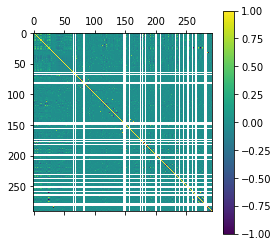

In [65]:
#ndb=110
correlacio=df.corr()
#print(correlacio)
plt.figure(figsize=(20,20))

plt.matshow(correlacio)
plt.colorbar()
plt.show()
cordl=correlacio.nlargest(ndb,"SalePrice")
cords=correlacio.nsmallest(ndb,"SalePrice")



In [66]:
print(cords["SalePrice"])

ExterQual_TA          -0.572202
KitchenQual_Ta        -0.510172
BsmtQual_TA           -0.428603
GarageFinish_Unf      -0.395703
MasVnrType_None       -0.353085
GarageType_Detchd     -0.352534
Foundation_CBlock     -0.309425
MSZoning_RM           -0.299927
LotShape_Reg          -0.290899
HeatingQC_TA          -0.288126
CentralAir_N          -0.256963
GarageType_nan        -0.243396
GarageQual_NaN        -0.243396
GarageCond_NaN        -0.243396
Foundation_BrkTil     -0.192702
Electrical_FuseA      -0.186842
Edwards               -0.184203
NAmes                 -0.177170
OldTown               -0.175918
KitchenQual_Fa        -0.173126
Exterior1st_MetalSd   -0.171590
BsmtFinType1_Na       -0.167019
Exterior2nd_MetalSd   -0.166010
RoofStyle_Gable       -0.162117
RoofMatl_CompShg      -0.160300
Exterior1st_Wd Sdng   -0.154643
BrkSide               -0.154582
Exterior2nd_Wd Sdng   -0.151354
IDOTRR                -0.150766
KitchenAbvGr          -0.145695
Electrical_FuseF      -0.143797
HouseSty

# MasVnrArea: Masonry veneer area in square  feet

In [67]:
# csináljuk egy lineáris korrelációt, hátha ki tudjuk találni a hiányzó értékeket
cormasonryL=correlacio.nlargest(ndb,"MasVnrArea")
cormasonryS=correlacio.nsmallest(ndb,"MasVnrArea")
mascorridx=40
cormasonryX1=cormasonryL["MasVnrArea"][1:mascorridx]
cormasonryX2=cormasonryS["MasVnrArea"][1:mascorridx]
l1=list(cormasonryX1.index)
l2=list(cormasonryX2.index)
maslist=l1+l2
#print(maslist)

masX_df=df[maslist]
masX_df.describe()
masY_df=df["MasVnrArea"]
masY_df.describe()

from sklearn import datasets, linear_model

alpha=0.0001

from sklearn.linear_model import Lasso
alpha=0.001
lassoregMAS = Lasso(alpha=alpha,normalize=True, max_iter=1e6)
lassoregMAS.fit(masX_df,masY_df)
lassopredMAS = lassoregMAS.predict(masX_df)

lregMAS = linear_model.Ridge()  
lregMAS.fit(masX_df,masY_df)
lreg_predMAS = lregMAS.predict(masX_df)
print(maslist)

['MasVnrType_BrkFace', 'SalePrice', 'OverallQual', 'GrLivArea', 'NoRidge', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'BsmtFinSF1', 'ExterQual_Ex', 'Fireplaces', 'NridgHt', 'BsmtFinType1_GLQ', 'RoofStyle_Hip', 'HalfBath', '2ndFlrSF', 'GarageType_Attchd', 'KitchenQual_Ex', 'HouseStyle_2Story', 'ExterQual_Gd', 'Foundation_PConc', 'WoodDeckSF', 'GarageFinish_Fin', 'GarageQual_TA', 'FireplaceQu_TA', 'FireplaceQu_Ex', 'HeatingQC_Ex', 'GarageYrBlt', 'MasVnrType_Stone', 'GarageFinish_RFn', 'LotFrontage', 'YearRemodAdd', 'BrDale', 'Exterior2nd_VinylSd', 'ExterQual_TA', 'GarageFinish_Unf', 'Foundation_BrkTil', 'RoofStyle_Gable', 'GarageType_Detchd', 'BsmtQual_TA', 'KitchenQual_Ta', 'OldTown', 'Exterior2nd_Wd Sdng', 'OverallCond', 'Exterior1st_Wd Sdng', 'BsmtFinType1_Unf', 'HouseStyle_1.5Fin', 'MSZoning_RM', 'CentralAir_N', 'GarageType_nan', 'GarageQual_NaN', 'GarageCond_NaN', 'BrkSide', 'Exterior1st_BrkFace', 'Fence_MnPrv', 'El

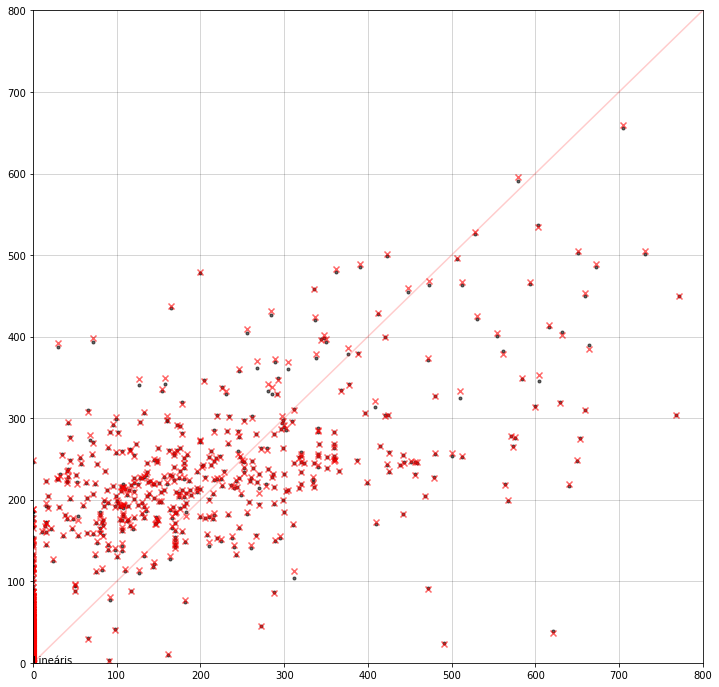

In [68]:

plt.figure(figsize=(12,12))
plt.subplot(111, facecolor="white",)
plt.grid(color="black", alpha=0.2)
plt.plot([0,600000],[0,600000],c="red", alpha=0.2)

plt.scatter(masY_df,lreg_predMAS,c="black",alpha=0.6,marker=".",)
plt.scatter(masY_df,lassopredMAS,c="red",alpha=0.6,marker="x",)


#plt.scatter(masY_df,masX_df,c="red",alpha=0.3,marker="X")

plt.text(0,0,"Lineáris")
plt.xlim(0,800)
plt.ylim(0,800)


plt.show()

# Ez nem jött be! Nem látszik az összefüggés!


---




Innen vissza a fővonalra
---



In [69]:
#@title Default title text
correlationLimit = 0.1 #@param {type:"number"}


In [70]:
#print(cordl["SalePrice"])
ColListF=[]
ColListA=[]

for i in cordl.index:
    if cordl.loc[i,"SalePrice"] > correlationLimit:
        ColListF.append(i)

print(ColListF)
for i in cords.index:
    if cords.loc[i,"SalePrice"] <  -1.0*correlationLimit:
        ColListA.append(i)

print(ColListA)


['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', 'GarageType_Attchd', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'Exterior2nd_VinylSd', 'GarageCond_TA', 'Exterior1st_VinylSd', 'FireplaceQu_Gd', 'HouseStyle_2Story', 'MSZoning_RL', 'CentralAir_Y', 'MasVnrType_BrkFace', 'FireplaceQu_Ex', 'LotShape_IR1', 'Electrical_SBrkr', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'MasVnrType_Stone', 'RoofMatl_WdShngl', 'BedroomAbvGr', 'BsmtUnfSF', 'GarageType_BuiltIn', 'GarageFinish_RFn', 'RoofStyle_Hip', 'Fence_NA', 'LotConfig_CulDSac', 'StoneBr', 'BldgType_1Fam', 'Timber', 'BsmtCond_TA', 'LotShape_IR2', 'So

In [71]:
l1=list(cordl["SalePrice"].index)
print(l1)
l2=list(cords["SalePrice"].index)

['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', 'GarageType_Attchd', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'Exterior2nd_VinylSd', 'GarageCond_TA', 'Exterior1st_VinylSd', 'FireplaceQu_Gd', 'HouseStyle_2Story', 'MSZoning_RL', 'CentralAir_Y', 'MasVnrType_BrkFace', 'FireplaceQu_Ex', 'LotShape_IR1', 'Electrical_SBrkr', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'MasVnrType_Stone', 'RoofMatl_WdShngl', 'BedroomAbvGr', 'BsmtUnfSF', 'GarageType_BuiltIn', 'GarageFinish_RFn', 'RoofStyle_Hip', 'Fence_NA', 'LotConfig_CulDSac', 'StoneBr', 'BldgType_1Fam', 'Timber', 'BsmtCond_TA', 'LotShape_IR2', 'So

In [72]:

nlarge=list((ColListF+ColListA))
# ha összefűződik a 2 lista lehet, hogy benne van a SalePrice is. Az NAGYON nem jó
if "SalePrice" in nlarge[1:]:
    print("SalePrice a fedélzeten :-( ")


print(nlarge)
print(len(nlarge))


for i in df.columns:
    if i not in nlarge:
        df.drop(columns=[i], inplace=True)



df.head()

['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', 'GarageType_Attchd', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'Exterior2nd_VinylSd', 'GarageCond_TA', 'Exterior1st_VinylSd', 'FireplaceQu_Gd', 'HouseStyle_2Story', 'MSZoning_RL', 'CentralAir_Y', 'MasVnrType_BrkFace', 'FireplaceQu_Ex', 'LotShape_IR1', 'Electrical_SBrkr', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'MasVnrType_Stone', 'RoofMatl_WdShngl', 'BedroomAbvGr', 'BsmtUnfSF', 'GarageType_BuiltIn', 'GarageFinish_RFn', 'RoofStyle_Hip', 'Fence_NA', 'LotConfig_CulDSac', 'StoneBr', 'BldgType_1Fam', 'Timber', 'BsmtCond_TA', 'LotShape_IR2', 'So

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,MeadowV,IDOTRR,BrkSide,Edwards,OldTown,Sawyer,NAmes,Somerst,Timber,StoneBr,NridgHt,NoRidge,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotConfig_CulDSac,Condition1_Artery,Condition1_Feedr,Condition1_Norm,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,HouseStyle_1Story,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterQual_Fa,ExterCond_FA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Fa,BsmtCond_TA,BsmtCond_Fa,BsmtFinType1_GLQ,BsmtFinType1_BLQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_Na,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_FA,CentralAir_N,CentralAir_Y,Electrical_SBrkr,Electrical_FuseA,Electrical_FuseF,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_Ta,KitchenQual_Fa,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Gd,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageQual_Fa,GarageQual_NaN,GarageCond_TA,GarageCond_Fa,GarageCond_NaN,Fence_MnPrv,Fence_NA
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,208500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,223500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,85.0,14115,5,1993,1995,0.0,732,64,796,796,566,1362,1,1,1,1,1,5,0,1993.0,2,480,40,30,0,0,142300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [73]:
# Checking NaN columns BEFORE Cleaning
print('Total Rows- BEFORE Cleaning: ', df.shape[0])
print('Total Columns- BEFORE Cleaning: ', df.shape[1], '\n')
nans = df.isnull().sum()
nans = nans[nans!=0]
print('Total NaN values - BEFORE Cleaning:\n',nans)

Total Rows- BEFORE Cleaning:  1198
Total Columns- BEFORE Cleaning:  121 

Total NaN values - BEFORE Cleaning:
 Series([], dtype: int64)


In [74]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 7)

print(df)

      LotFrontage  LotArea  OverallQual  ...  GarageCond_NaN  Fence_MnPrv  \
0            65.0     8450            7  ...             0.0          0.0   
1            80.0     9600            6  ...             0.0          0.0   
2            68.0    11250            7  ...             0.0          0.0   
4            84.0    14260            8  ...             0.0          0.0   
5            85.0    14115            5  ...             0.0          1.0   
...           ...      ...          ...  ...             ...          ...   
1455         62.0     7917            6  ...             0.0          0.0   
1456         85.0    13175            6  ...             0.0          1.0   
1457         66.0     9042            7  ...             0.0          0.0   
1458         68.0     9717            5  ...             0.0          0.0   
1459         75.0     9937            5  ...             0.0          0.0   

      Fence_NA  
0          1.0  
1          1.0  
2          1.0  
4      

In [75]:
df_minimal=df[nlarge]

#df=(df_minimal-df_minimal.min())/(df_minimal.max()-df_minimal.min())

df.replace(-np.inf,np.nan)
df.replace(np.inf,np.nan)
df.dropna()


X=df[nlarge[1:]]
#X=X.values.astype(np.float)
print(X.columns)
print(type(X))
Y=df[nlarge[0:1]]

print(Y.columns)
print(type(Y))



Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF',
       'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt',
       ...
       'EnclosedPorch', 'BsmtFinType1_Rec', 'BldgType_Duplex',
       'Condition1_Feedr', 'BldgType_2fmCon', 'BsmtFinType1_Unf',
       'HouseStyle_1Story', 'Exterior1st_AsbShng', 'HouseStyle_1.5Unf',
       'Condition1_Artery'],
      dtype='object', length=120)
<class 'pandas.core.frame.DataFrame'>
Index(['SalePrice'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [76]:
len(df.columns)
 

121

In [77]:
print(type(df))
print(nlarge)

df["SalePrice"]
df.columns

<class 'pandas.core.frame.DataFrame'>
['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', 'GarageType_Attchd', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'Exterior2nd_VinylSd', 'GarageCond_TA', 'Exterior1st_VinylSd', 'FireplaceQu_Gd', 'HouseStyle_2Story', 'MSZoning_RL', 'CentralAir_Y', 'MasVnrType_BrkFace', 'FireplaceQu_Ex', 'LotShape_IR1', 'Electrical_SBrkr', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'MasVnrType_Stone', 'RoofMatl_WdShngl', 'BedroomAbvGr', 'BsmtUnfSF', 'GarageType_BuiltIn', 'GarageFinish_RFn', 'RoofStyle_Hip', 'Fence_NA', 'LotConfig_CulDSac', 'StoneBr', 'BldgType_1Fam', 'Timbe

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_TA',
       'GarageQual_Fa', 'GarageQual_NaN', 'GarageCond_TA', 'GarageCond_Fa',
       'GarageCond_NaN', 'Fence_MnPrv', 'Fence_NA'],
      dtype='object', length=121)

In [78]:
print(df)

sns.set()
#print(df.head())
#sns.pairplot(df[nlarge[0:15]])
#plt.show()


      LotFrontage  LotArea  OverallQual  ...  GarageCond_NaN  Fence_MnPrv  \
0            65.0     8450            7  ...             0.0          0.0   
1            80.0     9600            6  ...             0.0          0.0   
2            68.0    11250            7  ...             0.0          0.0   
4            84.0    14260            8  ...             0.0          0.0   
5            85.0    14115            5  ...             0.0          1.0   
...           ...      ...          ...  ...             ...          ...   
1455         62.0     7917            6  ...             0.0          0.0   
1456         85.0    13175            6  ...             0.0          1.0   
1457         66.0     9042            7  ...             0.0          0.0   
1458         68.0     9717            5  ...             0.0          0.0   
1459         75.0     9937            5  ...             0.0          0.0   

      Fence_NA  
0          1.0  
1          1.0  
2          1.0  
4      

In [79]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Checking NaN columns BEFORE Cleaning
print('Total Rows- BEFORE Cleaning: ', df.shape[0])
print('Total Columns- BEFORE Cleaning: ', df.shape[1], '\n')
nans = df.isnull().sum()
nans = nans[nans!=0]
print('Total NaN values - BEFORE Cleaning:\n',nans)

Total Rows- BEFORE Cleaning:  1198
Total Columns- BEFORE Cleaning:  121 

Total NaN values - BEFORE Cleaning:
 Series([], dtype: int64)


In [80]:
from sklearn import datasets, linear_model

#print(df.describe())

alpha=0.0001


#print(X)
#print(Y)
#for i in nlarge[0:0]:
#    print(i,Y[i].sum())
#print(df[["SalePrice"]])




lreg = linear_model.Ridge()  
lreg.fit(X,Y)
lreg_pred = lreg.predict(X)

In [81]:
Y.describe()

,SalePrice
count,1198.000000
mean,175150.116027
std,69724.864253
min,39300.000000
25%,130000.000000
50%,160000.000000
75%,205000.000000
max,755000.000000


1198
count    1198.000000
mean       -0.620543
std        11.131639
min      -107.449907
25%        -6.027034
50%         0.191466
75%         5.818056
max        36.932491
dtype: float64


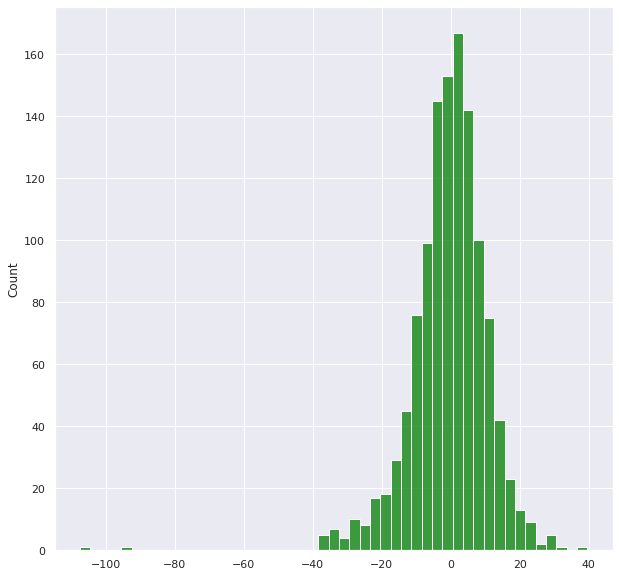

In [82]:
delta_list=[]
import seaborn as sns
h=len(df["SalePrice"])
print(h)
sns.set()
for i in range(h):
    #print(i)
    
    deltapercent=(Y.iloc[i,0]-lreg_pred[i])/Y.iloc[i,0]*100
    #print(f"{i} --{deltapercent}")
    delta_list.append(deltapercent[0])
       

plt.figure(figsize=(10,10))
sns.histplot(delta_list,color="green", binwidth=3,);

a=pd.Series(delta_list)
#print(endofparam,a.describe())
print(a.describe())

# **Ez eddig elég meggyőző! Lehet még rajta javítani?**

# **Outlier keresés**

In [83]:
#Outlier keresés
# hol is tatunk most az eredeti esetszámhoz képest?
print(f"Az aktuális esetszám: {max(df.index)}")
df.head()

Az aktuális esetszám: 1459


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,MeadowV,IDOTRR,BrkSide,Edwards,OldTown,Sawyer,NAmes,Somerst,Timber,StoneBr,NridgHt,NoRidge,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotConfig_CulDSac,Condition1_Artery,Condition1_Feedr,Condition1_Norm,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,HouseStyle_1Story,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterQual_Fa,ExterCond_FA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Fa,BsmtCond_TA,BsmtCond_Fa,BsmtFinType1_GLQ,BsmtFinType1_BLQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_Na,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_FA,CentralAir_N,CentralAir_Y,Electrical_SBrkr,Electrical_FuseA,Electrical_FuseF,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_Ta,KitchenQual_Fa,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Gd,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageQual_Fa,GarageQual_NaN,GarageCond_TA,GarageCond_Fa,GarageCond_NaN,Fence_MnPrv,Fence_NA
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,208500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,181500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,223500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,85.0,14115,5,1993,1995,0.0,732,64,796,796,566,1362,1,1,1,1,1,5,0,1993.0,2,480,40,30,0,0,142300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

# Ransac regresszió számol outliereket is!
# Nézzük mire megyünk vele!!

1198


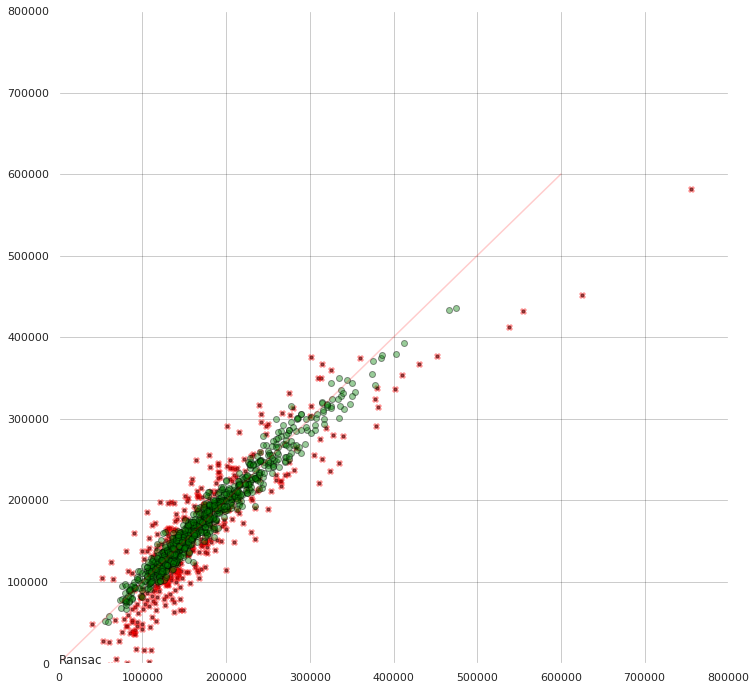

In [84]:
ransacreg = linear_model.RANSACRegressor()
ransacreg.fit(X, Y)
inlier_mask = ransacreg.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
ransacpred=ransacreg.predict(X)
plt.figure(figsize=(12,12))


plt.subplot(111, facecolor="white",)
plt.grid(color="black", alpha=0.2)
plt.plot([0,600000],[0,600000],c="red", alpha=0.2)

plt.scatter(Y[outlier_mask],ransacpred[:][outlier_mask],c="black",alpha=0.6,marker=".",)
plt.scatter(Y[outlier_mask],ransacpred[:][outlier_mask],c="red",alpha=0.3,marker="X")
plt.scatter(Y[inlier_mask],ransacpred[:][inlier_mask],c="green",alpha=0.4,marker="o",edgecolors="black")
#plt.scatter(df["Id"][inlier_mask],df["SalePrice"][inlier_mask],c="green",alpha=0.9,marker="o")
#plt.scatter(df["Id"],ransacpred[:],c="red",alpha=0.9,marker=".")

plt.text(0,0,"Ransac")
plt.xlim(0,800000)
plt.ylim(0,800000)

print(len(ransacpred))
plt.show()

In [85]:
outlierDB=sum(outlier_mask)
inlierDB=sum(inlier_mask)
independentDB=len(X.columns)
print(list(X.head()))

print(f"\nA összes mintából ({outlierDB+inlierDB}) RANSAC módszer alapján az outlierek száma: {outlierDB}. \n ")
print(f"Független változók száma: {independentDB}")
print(pd.DataFrame(ransacpred,columns=["Ransac Predictor"]).describe(),"\n\n\n",Y.describe())


['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'ExterQual_Gd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'Foundation_PConc', 'MasVnrArea', 'KitchenQual_Ex', 'BsmtQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'BsmtFinSF1', 'NoRidge', 'GarageFinish_Fin', 'KitchenQual_Gd', 'ExterQual_Ex', 'GarageType_Attchd', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtQual_Gd', 'NridgHt', 'HalfBath', 'LotFrontage', 'GarageYrBlt', 'LotArea', 'Exterior2nd_VinylSd', 'GarageCond_TA', 'Exterior1st_VinylSd', 'FireplaceQu_Gd', 'HouseStyle_2Story', 'MSZoning_RL', 'CentralAir_Y', 'MasVnrType_BrkFace', 'FireplaceQu_Ex', 'LotShape_IR1', 'Electrical_SBrkr', 'GarageQual_TA', 'FireplaceQu_TA', 'BsmtFullBath', 'MasVnrType_Stone', 'RoofMatl_WdShngl', 'BedroomAbvGr', 'BsmtUnfSF', 'GarageType_BuiltIn', 'GarageFinish_RFn', 'RoofStyle_Hip', 'Fence_NA', 'LotConfig_CulDSac', 'StoneBr', 'BldgType_1Fam', 'Timber', 'BsmtCond_TA', 'LotShape_IR2', 'Somerst', 'Scre

# Ransacot kielemeztük 

# Nézzünk egy LASSO-t

In [86]:
from sklearn.linear_model import Lasso
alpha=0.01
lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e6)
lassoreg.fit(X,Y)
lassopred = lassoreg.predict(X)


1198


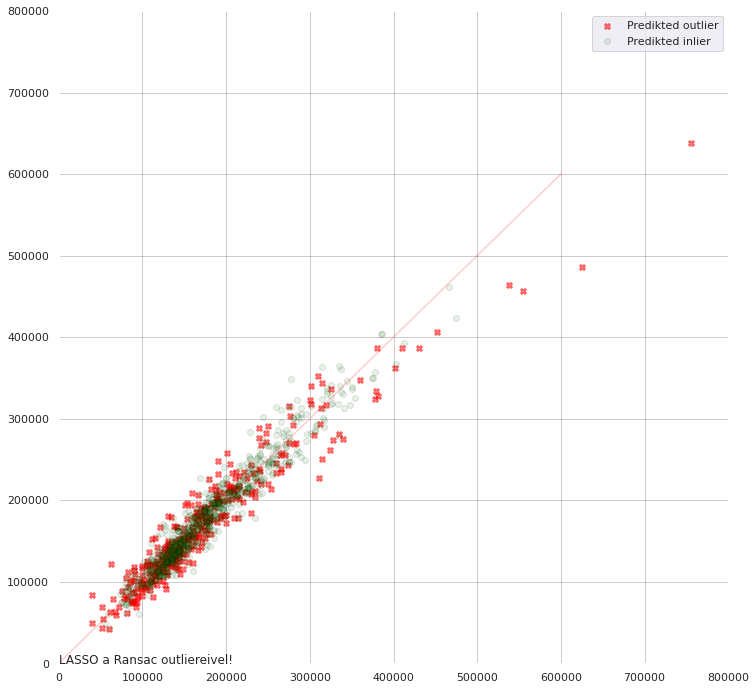

In [87]:
plt.figure(figsize=(12,12))


plt.subplot(111, facecolor="white",)
plt.grid(color="black", alpha=0.2)
plt.plot([0,600000],[0,600000],c="red", alpha=0.2)

#plt.scatter(Y[outlier_mask],lassopred[:][outlier_mask],c="black",alpha=0.6,marker=".")
plt.scatter(Y[outlier_mask],lassopred[:][outlier_mask],c="red",alpha=0.5,marker="X",label="Predikted outlier")
plt.scatter(Y[inlier_mask],lassopred[:][inlier_mask],c="green",alpha=0.1,marker="o",edgecolors="black", label="Predikted inlier")
#plt.scatter(df["Id"][inlier_mask],df["SalePrice"][inlier_mask],c="green",alpha=0.9,marker="o")
#plt.scatter(df["Id"],ransacpred[:],c="red",alpha=0.9,marker=".")
plt.legend()
plt.text(0,0,"LASSO a Ransac outliereivel!")
plt.xlim(0,800000)
plt.ylim(0,800000)
plt

print(len(lassopred))
plt.show()

# **Nézzük mi van ha csak a fél adathalmazra tanítjuk**



---



In [88]:
divnum = 0.8 #@param {type:"slider", min:0, max:1, step:0.1}


In [89]:
#divnum=0.7
Ysize=len(Y)
divider=int(Ysize*divnum)
Y1=Y[0:divider]
Y2=Y[divider:]
X1=X[0:divider]
X2=X[divider:]


In [90]:
from sklearn.linear_model import Lasso
alpha=0.00005 # itt lehet állítan a pontosságot
lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e9)
lassoreg.fit(X1,Y1)
lassopredY1 = lassoreg.predict(X1)
lassopredY2 = lassoreg.predict(X2)


In [91]:
a1=f"Tanítási minta: {len(Y1)} db."
a2=f"Visszateszt: {len(Y2)} db."
print(a)

0       -0.452656
1       12.739525
2        5.827769
3      -16.347017
4      -18.622631
          ...    
1193     1.929542
1194    -1.554707
1195     2.592375
1196    -8.108077
1197    -6.539163
Length: 1198, dtype: float64


958


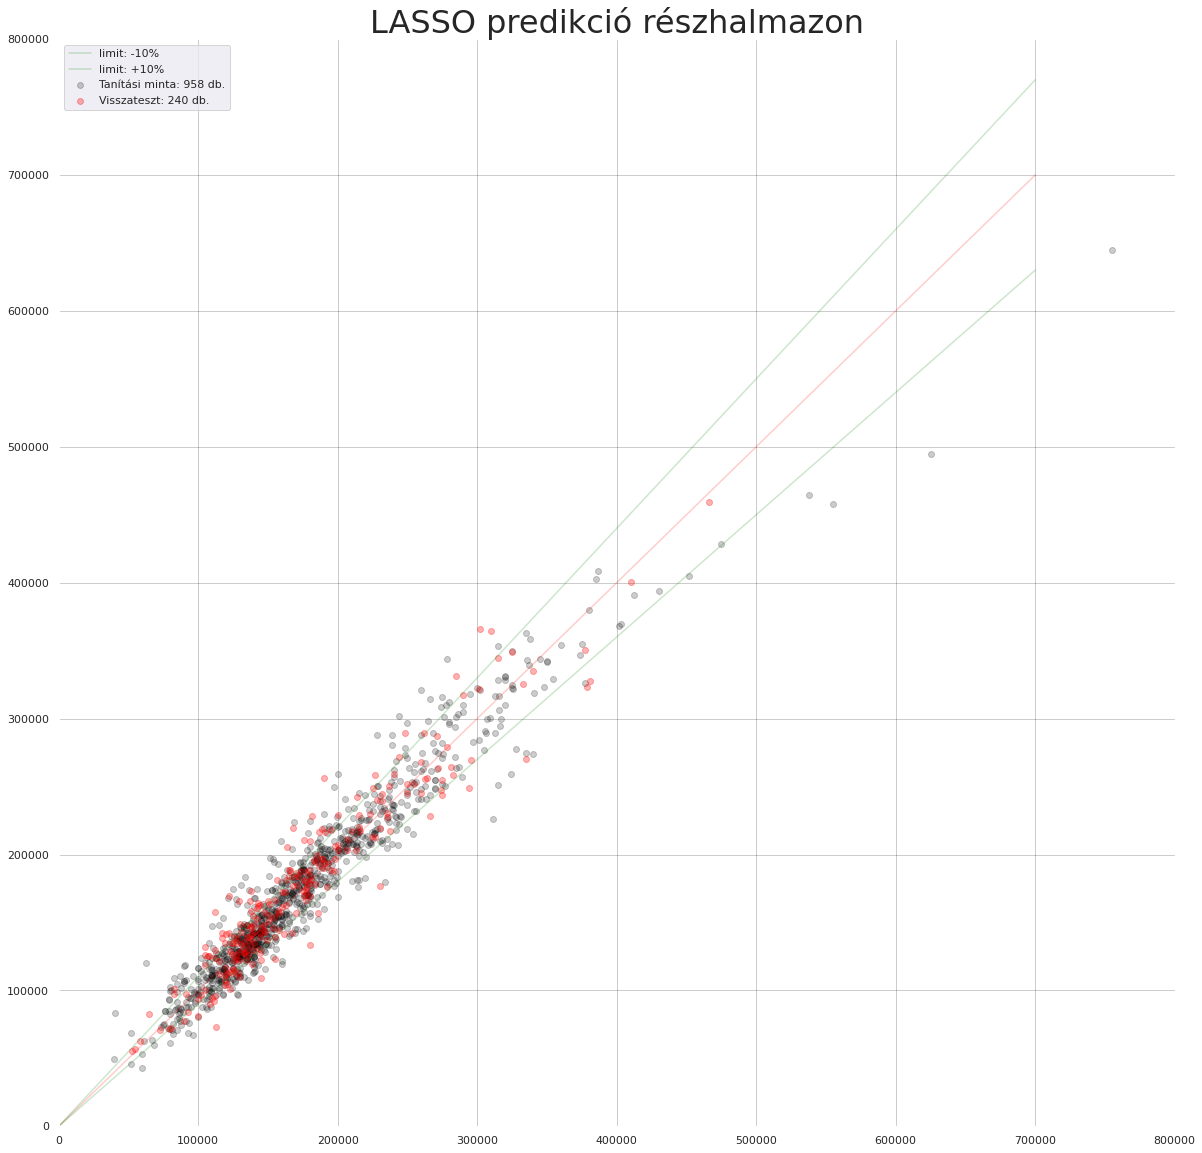

In [92]:
plt.figure(figsize=(20,20))
sz=10

a5sza=[i*(1-sz/100) for i in range(0,800000,100000)]
a5szf=[i*(1+sz/100) for i in range(0,800000,100000)]
a5szx=[i for i in range(0,800000,100000)]
l5sza=f"limit: -{sz}%"
l5szf=f"limit: +{sz}%"


plt.subplot(111, facecolor="white",)
plt.grid(color="black", alpha=0.2)

plt.plot([0,700000],[0,700000],c="red", alpha=0.2)

plt.scatter(Y1,lassopredY1[:],c="black",alpha=0.2,marker="o",label=a1)
plt.scatter(Y2,lassopredY2[:],c="red",alpha=0.3,marker="o",label=a2)

plt.plot(a5szx,a5sza,c="green", alpha=0.2, label=l5sza)
plt.plot(a5szx,a5szf,c="green", alpha=0.2, label=l5szf)


plt.xlim(0,800000)
plt.ylim(0,800000)

plt.legend()
plt.title("LASSO predikció részhalmazon",fontdict={"fontsize":32})
print(len(lassopredY1))
plt.show()

In [93]:
Y2.describe()

,SalePrice
count,240.000000
mean,174762.491667
std,66803.511820
min,52500.000000
25%,128975.000000
50%,159000.000000
75%,200000.000000
max,466500.000000


[-64128.31407371968, -25293.190134804536, -20184.639684872553, -19855.193953728678, -12877.45534124435, -11905.505987578603, -10458.011817516875, -8348.259624803402, -8237.376456059934, -8018.548718865947, -7911.260580494783, -7823.837104672402, -7772.38386911693, -6965.552723976404, -6076.26634912042, -5924.213355075398, -5682.22271560023, -5419.313445036063, -5321.49266555215, -5264.357381675678, -5165.447003483469, -4806.765905059759, -4659.99965832357, -3400.2248091167116, -3214.4547142688616, -3170.2071157921728, -3093.8183338151275, -2781.58326935466, -2028.7311000064203, -1716.9499491004226, -1386.1608014259712, -1100.9926561458126, -877.1609072210487, -758.3533487385532, -693.3722351603974, -600.4665470293903, -576.9766641106664, -327.63794062996516, -281.65261393171244, -62.47747426472342, -24.61503306164322, -15.596093523074728, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.5245208570117159, 5.792561306335663, 10.892349407400262, 11.587562078403113, 12.98195336234546, 15.44226688724476

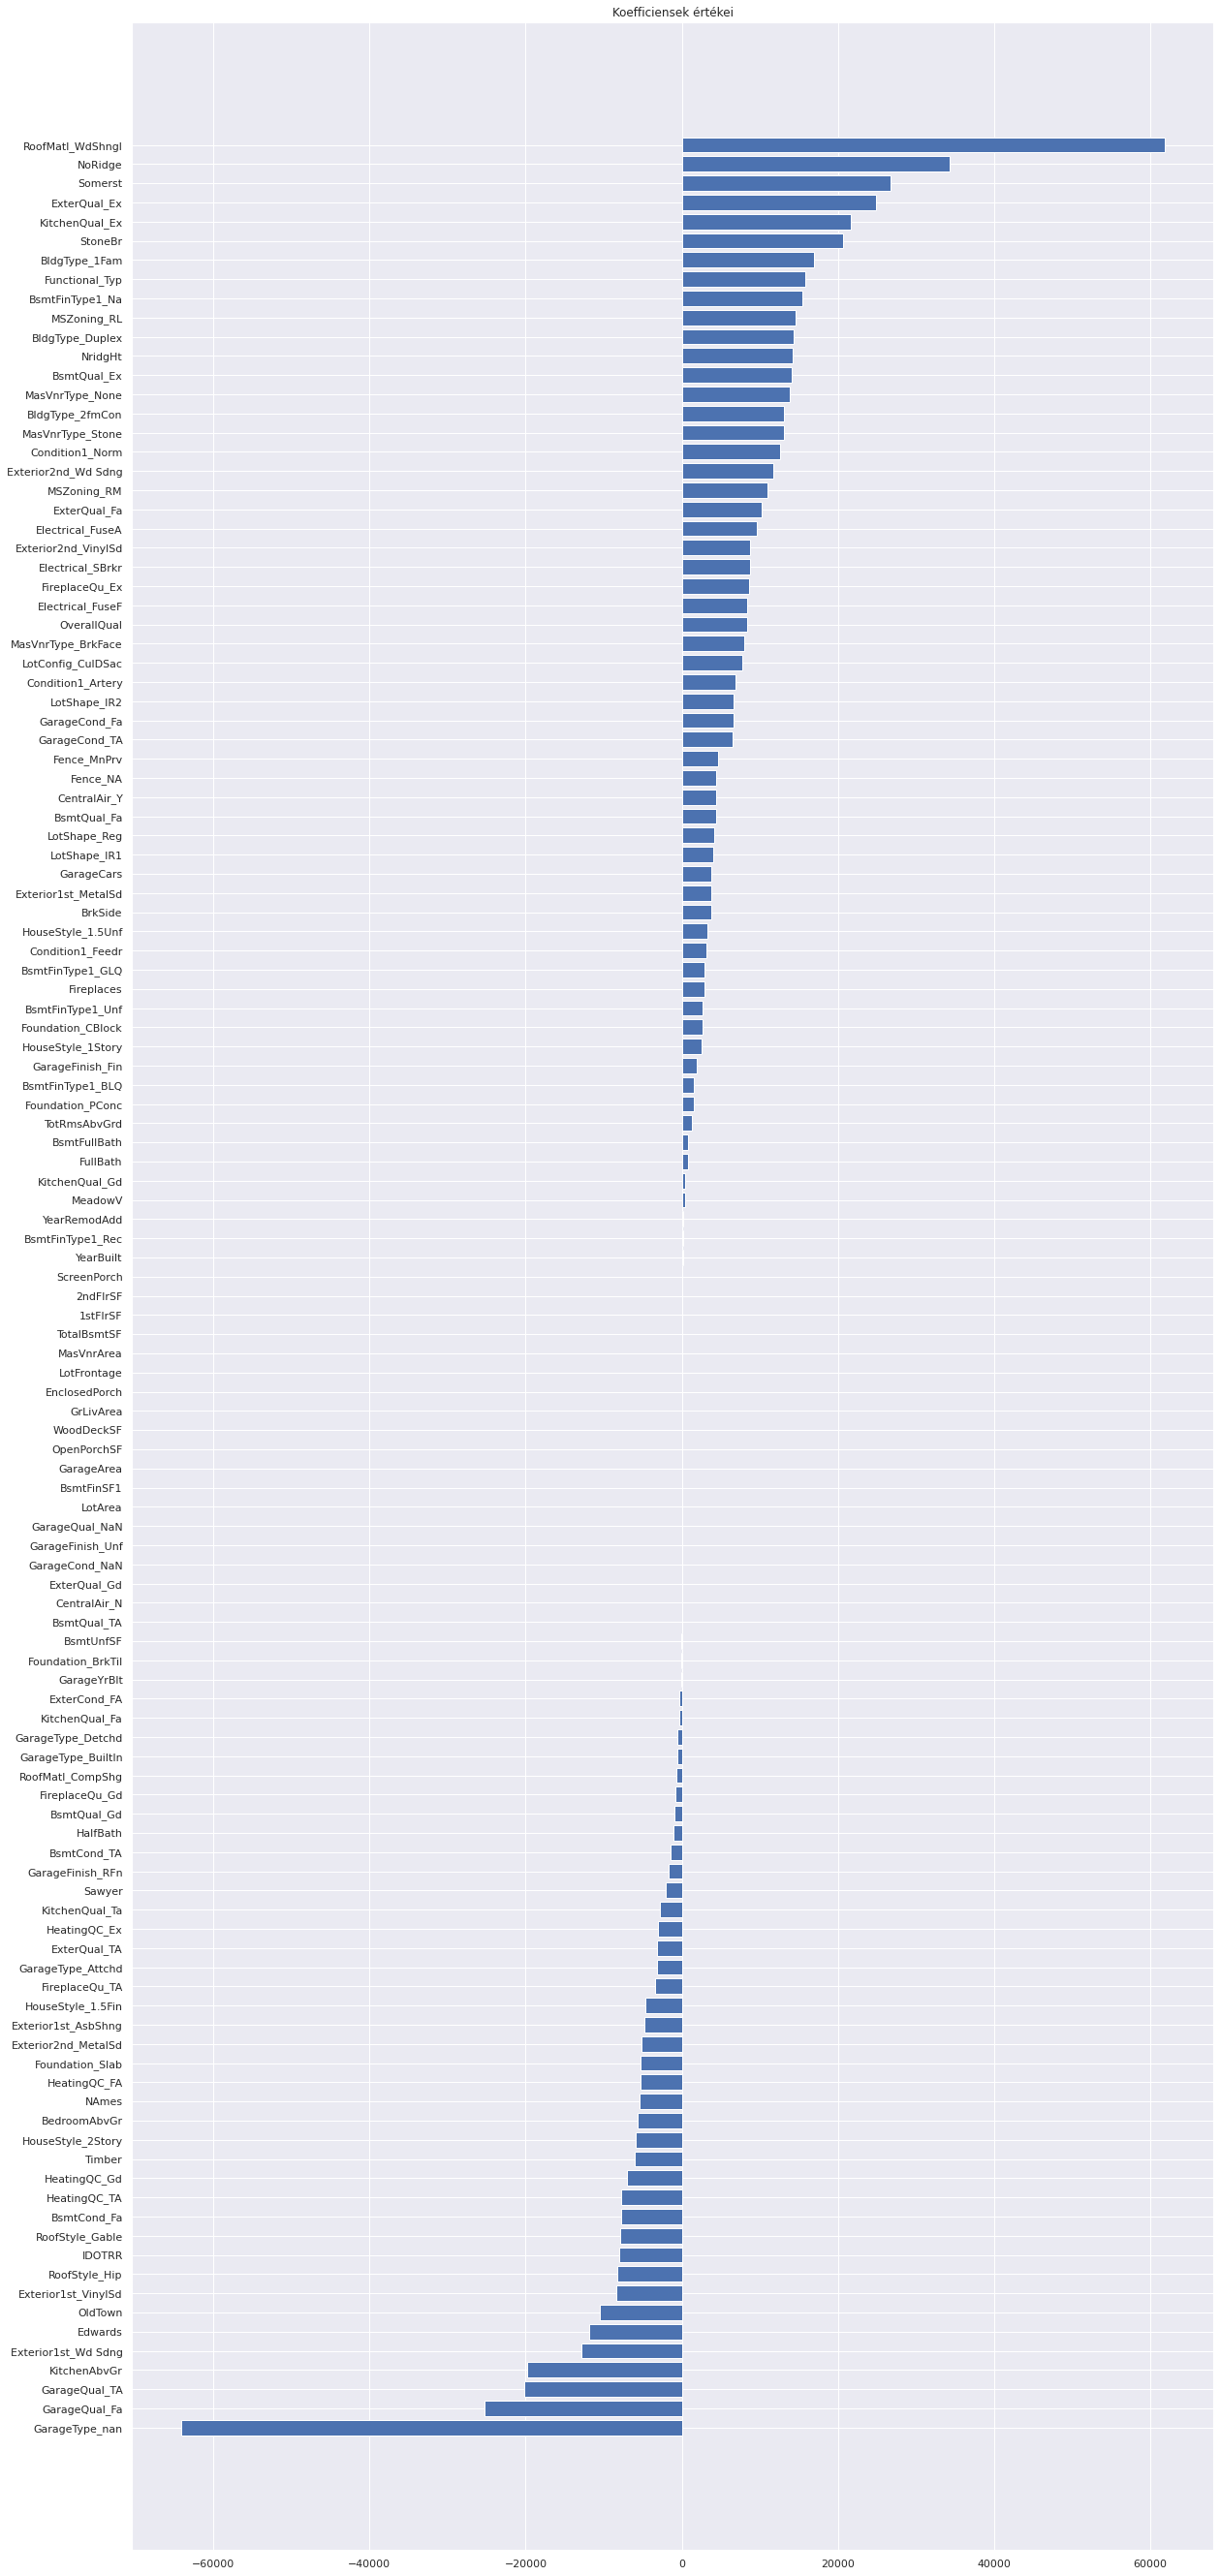

In [94]:
SX=X.columns
SY=lassoreg.coef_
ziped=zip(SY,SX)
SortedXY=sorted(ziped,reverse=False)
#print(SortedXY)
SX,SY=list(zip(*SortedXY))
SX=list(SX)
print(SX)
SY=list(SY)
plt.figure(figsize=(20,48))
#plt.barh(X.columns[0:90],lassoreg.coef_[0:90],)
plt.barh(SY,SX)
plt.title("Koefficiensek értékei")

plt.show()

In [95]:
a5sza=[i*0.95 for i in range(0,800000,100000)]
a5szf=[i*1.05 for i in range(0,800000,100000)]
a5szx=[i for i in range(0,800000,100000)]
